In [ ]:
# import matplotlib.pyplot as plt
# plt.rc('font', family="sans-serif", serif='Arial')
# plt.rc('text', usetex=False)
# plt.rc('xtick', labelsize=28)
# plt.rc('ytick', labelsize=28)
# plt.rc('axes', labelsize=32)

# plt.rcParams['hatch.linewidth'] = 5
# plt.rcParams['axes.linewidth'] = 3
# plt.rcParams['lines.linewidth'] = 3
small = (4,4)
medium = (8,4)
large = (12,4)
xlarge = (12,8)
xxlarge = (24,5)
xxxlarge = (20,5)
# figure_size = xlarge
# plt.figure(figsize=xlarge)

# linewidth = 1.5
# label_fontsize = 20
# xlabel_fontsize = 20
# inside_fontsize=18
# legend_fontsize = 19
# tick_fontsize = 24
# title_fontsize = 32
# bar_width = 0.7


Error: Session cannot generate requests

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

parse_dir = "./dsanalyzer_parsed"
typ = "DDP2GPU"
filename = "fsNprepNloadNtrain_openimage_randaugment_resnet50_epoch5_b512_worker16_thread0"
suffix_dir = "gpu_util"
file_path = f"{parse_dir}/{typ}/{suffix_dir}/{filename}.csv"
df=pd.read_csv(file_path)

yaxis = ["GPU0 Utilization(%)","GPU1 Utilization(%)","GPU2 Utilization(%)","GPU3 Utilization(%)"]
for y in yaxis:
    df[y] = list(map(lambda x: x[:-1], df[y].values))
    df[y] = df[y].astype(float, True)
df["timestamp"] = pd.to_datetime(df["timestamp"], format='%Y/%m/%d %H:%M:%S.%f', errors='ignore')
df = df[df["timestamp"] > '2021/11/05 21:36:46.980']
# df.plot(x="timestamp", y=yaxis, linewidth=0, marker='x',markersize=5, figsize=(60,5))
print(df.describe())

for y in yaxis:
    ax = df[y].plot.hist(cumulative=True, density=1, bins=10000, histtype='step')

ax.set_ylabel('CDF')
ax.set_xlabel('GPU Utilization (%)')
plt.savefig(f'./test.svg', bbox_inches='tight')

FileNotFoundError: [Errno 2] No such file or directory: './dsanalyzer_parsed/DDP2GPU/gpu_util/fsNprepNloadNtrain_openimage_randaugment_resnet50_epoch5_b512_worker16_thread0.csv'

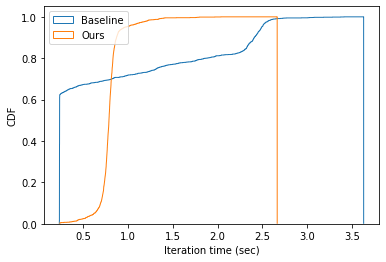

<Figure size 432x288 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
parse_dir = "./dsanalyzer_parsed"
typ = "DDP2GPU"
suffix_dir = ""
filename = "fsNprepNloadNtrainQuartRun_openimage_randaugment_resnet50_epoch1_b256_worker8_thread8"
file_path = f"{parse_dir}/{typ}/{suffix_dir}/{filename}.csv"
df=pd.read_csv(file_path)

suffix_dir = ""
filename = "fsNprepNloadNtrainAdaptiveBackIntraIterGMQuartRun_openimage_randaugment_resnet50_epoch1_b256_worker8_thread8"
file_path = f"{parse_dir}/{typ}/{suffix_dir}/{filename}.csv"
df2=pd.read_csv(file_path)
# filename = "fsNprepNloadNtrainBackFIFOPolicy_openimage_randaugment_resnet50_epoch1_b256_worker10_thread4_stalldifftime"
# file_path = f"{parse_dir}/{typ}/{suffix_dir}/{filename}.csv"
# df2=pd.read_csv(file_path)

# filename = "fsNprepNloadNtrain075thresBackFIFOPolicy_openimage_randaugment_resnet50_epoch1_b256_worker10_thread4_stalldifftime"
# file_path = f"{parse_dir}/{typ}/{suffix_dir}/{filename}.csv"
# df3=pd.read_csv(file_path)

# df["timestamp"] = pd.to_datetime(df["timestamp"], format='%Y/%m/%d %H:%M:%S.%f', errors='ignore')

# df.plot(x="timestamp", y=yaxis, linewidth=0, marker='x',markersize=5, figsize=(60,5))
yaxis = ["Iteration time (sec)"]
df = df[df['Step'] > 10]
df2 = df2[df2['Step'] > 10]
ax = df[yaxis[0]].plot.hist(cumulative=True, density=1, bins=10000, histtype='step')
ax = df2[yaxis[0]].plot.hist(cumulative=True, density=1, bins=10000, histtype='step')
# ax = df3[yaxis[0]].plot.hist(cumulative=True, density=1, bins=10000, histtype='step')
L = ax.legend(loc="upper left")
L.get_texts()[0].set_text('Baseline')
L.get_texts()[1].set_text('Ours')
# ax.set_xlim(xmin=0.5,xmax=1.0)
ax.set_ylabel('CDF')
ax.set_xlabel('Iteration time (sec)')
# ax.legend(loc="upper left")
plt.figure()
plt.savefig(f'./test1.svg', bbox_inches='tight')

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
parse_dir = "./dsanalyzer_parsed"
typ = "DDP4GPUInter"
suffix_dir = ""
filename = "fsNprepNloadNtrainAdaptiveBackIntraIterGMQuartRun_openimage_randaugment_resnet50_epoch1_b512_worker16_thread8"
file_path = f"{parse_dir}/{typ}/{suffix_dir}/{filename}.csv"
df=pd.read_csv(file_path)
# filename = "fsNprepNloadNtrainBackFIFOPolicy_openimage_randaugment_resnet50_epoch1_b256_worker10_thread4_stalldifftime"
# file_path = f"{parse_dir}/{typ}/{suffix_dir}/{filename}.csv"
# df2=pd.read_csv(file_path)

# filename = "fsNprepNloadNtrain075thresBackFIFOPolicy_openimage_randaugment_resnet50_epoch1_b256_worker10_thread4_stalldifftime"
# file_path = f"{parse_dir}/{typ}/{suffix_dir}/{filename}.csv"
# df3=pd.read_csv(file_path)

# df["timestamp"] = pd.to_datetime(df["timestamp"], format='%Y/%m/%d %H:%M:%S.%f', errors='ignore')

# df.plot(x="timestamp", y=yaxis, linewidth=0, marker='x',markersize=5, figsize=(60,5))
yaxis = ["Iteration time (sec)"]

In [ ]:
print(df[yaxis[0]].describe())
mean = df[yaxis[0]].mean()
quantiles = [
df[yaxis[0]].quantile(0.90),
df[yaxis[0]].quantile(0.95),
df[yaxis[0]].quantile(0.99),
df[yaxis[0]].quantile(0.995),
df[yaxis[0]].quantile(0.999)
]


count    3405.000000
mean        0.828538
std         1.683575
min         0.243666
25%         0.746137
50%         0.795286
75%         0.842152
max        98.411508
Name: Iteration time (sec), dtype: float64


In [ ]:
df[yaxis[0]].quantile(0.97)

1.25577364

In [ ]:
for i in quantiles:
    dfquantile = df[df[yaxis[0]] < i]
    print("Quantiles",i)
    print(dfquantile[yaxis[0]].describe())

Quantiles 0.9184821999999999
count    3064.000000
mean        0.758451
std         0.122430
min         0.243666
25%         0.739525
50%         0.787187
75%         0.828821
max         0.918049
Name: Iteration time (sec), dtype: float64
Quantiles 1.0819986
count    3234.000000
mean        0.770225
std         0.129623
min         0.243666
25%         0.744904
50%         0.791165
75%         0.834812
max         1.081957
Name: Iteration time (sec), dtype: float64
Quantiles 1.56742864
count    3370.000000
mean        0.790306
std         0.162533
min         0.243666
25%         0.746043
50%         0.793893
75%         0.840424
max         1.567420
Name: Iteration time (sec), dtype: float64
Quantiles 1.59884794
count    3387.000000
mean        0.794293
std         0.171575
min         0.243666
25%         0.746078
50%         0.794732
75%         0.841054
max         1.598845
Name: Iteration time (sec), dtype: float64
Quantiles 2.566548812
count    3401.000000
mean        0.798313
s

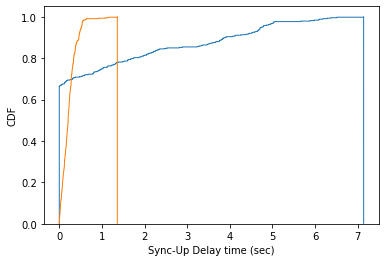

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
parse_dir = "./dsanalyzer_parsed"
typ = "DDP2GPU"
suffix_dir = ""
filename = "fsNprepNloadNtrainQuartRun_openimage_randaugment_resnet50_epoch1_b1024_worker8_thread8_stalldifftime"
file_path = f"{parse_dir}/{typ}/{suffix_dir}/{filename}.csv"
df=pd.read_csv(file_path)

suffix_dir = ""
filename = "fsNprepNloadNtrainAdaptiveBackIntraIterGMQuartRun_openimage_randaugment_resnet50_epoch1_b1024_worker8_thread8_stalldifftime"
file_path = f"{parse_dir}/{typ}/{suffix_dir}/{filename}.csv"
df2=pd.read_csv(file_path)
# filename = "fsNprepNloadNtrainBackFIFOPolicy_openimage_randaugment_resnet50_epoch1_b256_worker10_thread4_stalldifftime"
# file_path = f"{parse_dir}/{typ}/{suffix_dir}/{filename}.csv"
# df2=pd.read_csv(file_path)

# filename = "fsNprepNloadNtrain075thresBackFIFOPolicy_openimage_randaugment_resnet50_epoch1_b256_worker10_thread4_stalldifftime"
# file_path = f"{parse_dir}/{typ}/{suffix_dir}/{filename}.csv"
# df3=pd.read_csv(file_path)

# df["timestamp"] = pd.to_datetime(df["timestamp"], format='%Y/%m/%d %H:%M:%S.%f', errors='ignore')

# df.plot(x="timestamp", y=yaxis, linewidth=0, marker='x',markersize=5, figsize=(60,5))
yaxis = ["Delay time diff (sec)"]

ax = df[yaxis[0]].plot.hist(cumulative=True, density=1, bins=10000, histtype='step')
ax = df2[yaxis[0]].plot.hist(cumulative=True, density=1, bins=10000, histtype='step')
# ax = df3[yaxis[0]].plot.hist(cumulative=True, density=1, bins=10000, histtype='step')
# ax.legend(loc="upper left")
# ax.set_xlim(xmin=-0.5,xmax=9.0)
ax.set_ylabel('CDF')
ax.set_xlabel('Sync-Up Delay time (sec)')
# ax.legend(loc="upper left")
plt.savefig(f'./test1.svg', bbox_inches='tight')

In [ ]:
print(df[yaxis[0]].describe())
print(df2[yaxis[0]].describe())

count    850.000000
mean       3.453007
std        3.700893
min        0.000002
25%        0.000004
50%        2.767336
75%        6.257065
max       12.393316
Name: Delay time diff (sec), dtype: float64
count    850.000000
mean       0.577167
std        0.671936
min        0.053484
25%        0.345999
50%        0.460510
75%        0.570083
max        7.801288
Name: Delay time diff (sec), dtype: float64


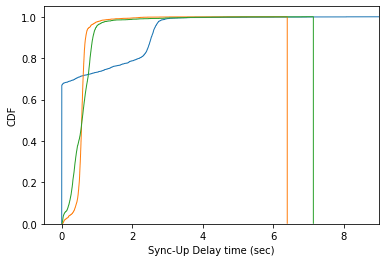

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
parse_dir = "./dsanalyzer_parsed"
typ = "DDP4GPU"
suffix_dir = ""
filename = "fsNprepNloadNtrain_openimage_randaugment_resnet50_epoch1_b512_worker16_thread8_stalldifftime"
file_path = f"{parse_dir}/{typ}/{suffix_dir}/{filename}.csv"
df=pd.read_csv(file_path)

suffix_dir = ""
filename = "fsNprepNloadNtrainBackFIFOPolicy_openimage_randaugment_resnet50_epoch1_b512_worker16_thread8_stalldifftime"
file_path = f"{parse_dir}/{typ}/{suffix_dir}/{filename}.csv"
df2=pd.read_csv(file_path)

filename = "fsNprepNloadNtrainBackIntraIterGM_openimage_randaugment_resnet50_epoch1_b512_worker16_thread8_stalldifftime"
file_path = f"{parse_dir}/{typ}/{suffix_dir}/{filename}.csv"
df3=pd.read_csv(file_path)
# filename = "fsNprepNloadNtrainBackFIFOPolicy_openimage_randaugment_resnet50_epoch1_b256_worker10_thread4_stalldifftime"
# file_path = f"{parse_dir}/{typ}/{suffix_dir}/{filename}.csv"
# df2=pd.read_csv(file_path)

# filename = "fsNprepNloadNtrain075thresBackFIFOPolicy_openimage_randaugment_resnet50_epoch1_b256_worker10_thread4_stalldifftime"
# file_path = f"{parse_dir}/{typ}/{suffix_dir}/{filename}.csv"
# df3=pd.read_csv(file_path)

# df["timestamp"] = pd.to_datetime(df["timestamp"], format='%Y/%m/%d %H:%M:%S.%f', errors='ignore')

# df.plot(x="timestamp", y=yaxis, linewidth=0, marker='x',markersize=5, figsize=(60,5))
yaxis = ["Delay time diff (sec)"]

ax = df[yaxis[0]].plot.hist(cumulative=True, density=1, bins=10000, histtype='step')
ax = df2[yaxis[0]].plot.hist(cumulative=True, density=1, bins=10000, histtype='step')
ax = df3[yaxis[0]].plot.hist(cumulative=True, density=1, bins=10000, histtype='step')
# ax = df3[yaxis[0]].plot.hist(cumulative=True, density=1, bins=10000, histtype='step')
# ax.legend(loc="upper left")
ax.set_xlim(xmin=-0.5,xmax=9.0)
ax.set_ylabel('CDF')
ax.set_xlabel('Sync-Up Delay time (sec)')
# ax.legend(loc="upper left")
plt.savefig(f'./test1.svg', bbox_inches='tight')

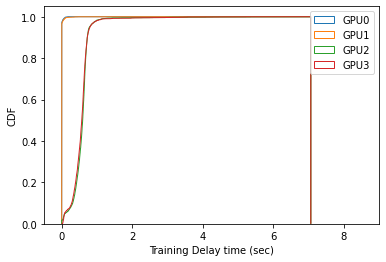

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
parse_dir = "./dsanalyzer_parsed"
typ = "DDP4GPU"
suffix_dir = ""
filename = "fsNprepNloadNtrain_openimage_randaugment_resnet50_epoch1_b512_worker16_thread8_stalldifftime"
file_path = f"{parse_dir}/{typ}/{suffix_dir}/{filename}.csv"
df=pd.read_csv(file_path)

suffix_dir = ""
filename = "fsNprepNloadNtrainBackFIFOPolicy_openimage_randaugment_resnet50_epoch1_b512_worker16_thread8_stalldifftime"
file_path = f"{parse_dir}/{typ}/{suffix_dir}/{filename}.csv"
df2=pd.read_csv(file_path)
# filename = "fsNprepNloadNtrainBackFIFOPolicy_openimage_randaugment_resnet50_epoch1_b256_worker10_thread4_stalldifftime"
# file_path = f"{parse_dir}/{typ}/{suffix_dir}/{filename}.csv"
# df2=pd.read_csv(file_path)

# filename = "fsNprepNloadNtrain075thresBackFIFOPolicy_openimage_randaugment_resnet50_epoch1_b256_worker10_thread4_stalldifftime"
# file_path = f"{parse_dir}/{typ}/{suffix_dir}/{filename}.csv"
# df3=pd.read_csv(file_path)

# df["timestamp"] = pd.to_datetime(df["timestamp"], format='%Y/%m/%d %H:%M:%S.%f', errors='ignore')

# df.plot(x="timestamp", y=yaxis, linewidth=0, marker='x',markersize=5, figsize=(60,5))
yaxis = ["Training stall time (sec)_gpu0","Training stall time (sec)_gpu1","Training stall time (sec)_gpu2","Training stall time (sec)_gpu3"]

# ax = df[yaxis[0]].plot.hist(cumulative=True, density=1, bins=10000, histtype='step')
ax = df2[yaxis].plot.hist(cumulative=True, density=1, bins=10000, histtype='step')
# ax = df3[yaxis[0]].plot.hist(cumulative=True, density=1, bins=10000, histtype='step')
# ax.legend(loc="upper left")
ax.set_xlim(xmin=-0.5,xmax=9.0)
ax.set_ylabel('CDF')
ax.set_xlabel('Training Delay time (sec)')
L = ax.legend()
for i, text in enumerate(L.get_texts()):
    text.set_text(f'GPU{i}')

plt.savefig(f'./test1.svg', bbox_inches='tight')

In [ ]:
df2.describe()

,Unnamed: 0,GPU,Epoch,Step,Iteration time (sec),Training stall time (sec),Throughput (image/sec)
count,13613.000000,13613.000000,13613.0,13613.000000,13613.000000,13613.000000,13613.000000
mean,6806.000000,1.499963,0.0,1701.874972,0.958129,0.283418,145.541905
std,3929.878942,1.118042,0.0,982.469743,0.467692,0.436246,47.614915
min,0.000000,0.000000,0.0,0.000000,0.315054,0.000000,4.018000
25%,3403.000000,1.000000,0.0,851.000000,0.879444,0.000002,128.845000
50%,6806.000000,1.000000,0.0,1702.000000,0.935044,0.037487,136.892000
75%,10209.000000,2.000000,0.0,2553.000000,0.993442,0.581567,145.547000
max,13612.000000,3.000000,0.0,3403.000000,31.860041,29.304725,406.279000


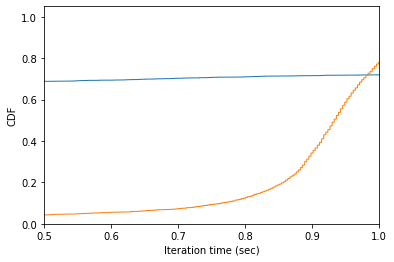

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
parse_dir = "./dsanalyzer_parsed"
typ = "DDP4GPU"
suffix_dir = ""
filename = "fsNprepNloadNtrain_openimage_randaugment_resnet50_epoch1_b512_worker16_thread8"
file_path = f"{parse_dir}/{typ}/{suffix_dir}/{filename}.csv"
df=pd.read_csv(file_path)

suffix_dir = ""
filename = "fsNprepNloadNtrainBackFIFOPolicy_openimage_randaugment_resnet50_epoch1_b512_worker16_thread8"
file_path = f"{parse_dir}/{typ}/{suffix_dir}/{filename}.csv"
df2=pd.read_csv(file_path)
# filename = "fsNprepNloadNtrainBackFIFOPolicy_openimage_randaugment_resnet50_epoch1_b256_worker10_thread4_stalldifftime"
# file_path = f"{parse_dir}/{typ}/{suffix_dir}/{filename}.csv"
# df2=pd.read_csv(file_path)

# filename = "fsNprepNloadNtrain075thresBackFIFOPolicy_openimage_randaugment_resnet50_epoch1_b256_worker10_thread4_stalldifftime"
# file_path = f"{parse_dir}/{typ}/{suffix_dir}/{filename}.csv"
# df3=pd.read_csv(file_path)

# df["timestamp"] = pd.to_datetime(df["timestamp"], format='%Y/%m/%d %H:%M:%S.%f', errors='ignore')

# df.plot(x="timestamp", y=yaxis, linewidth=0, marker='x',markersize=5, figsize=(60,5))
yaxis = ["Iteration time (sec)"]

ax = df[yaxis[0]].plot.hist(cumulative=True, density=1, bins=10000, histtype='step')
ax = df2[yaxis[0]].plot.hist(cumulative=True, density=1, bins=10000, histtype='step')
# ax = df3[yaxis[0]].plot.hist(cumulative=True, density=1, bins=10000, histtype='step')
# ax.legend(loc="upper left")
ax.set_xlim(xmin=0.5,xmax=1.0)
ax.set_ylabel('CDF')
ax.set_xlabel('Iteration time (sec)')
# ax.legend(loc="upper left")
plt.savefig(f'./test1.svg', bbox_inches='tight')

In [ ]:
df.describe()

,Unnamed: 0,GPU,Epoch,Step,Iteration time (sec),Training stall time (sec),Throughput (image/sec)
count,13613.000000,13613.000000,13613.0,13613.000000,13613.000000,13613.000000,13613.000000
mean,6806.000000,1.499963,0.0,1701.874972,0.969264,0.179169,306.735659
std,3929.878942,1.118042,0.0,982.469743,1.109543,0.640997,164.365313
min,0.000000,0.000000,0.0,0.000000,0.283970,0.000000,8.544000
25%,3403.000000,1.000000,0.0,851.000000,0.303975,0.000001,78.301000
50%,6806.000000,1.000000,0.0,1702.000000,0.310244,0.000002,412.578000
75%,10209.000000,2.000000,0.0,2553.000000,1.634723,0.000002,421.087000
max,13612.000000,3.000000,0.0,3403.000000,14.980561,11.671249,450.753000


In [ ]:
df2.describe()

,Unnamed: 0,GPU,Epoch,Step,Iteration time (sec),Training stall time (sec),Throughput (image/sec)
count,13613.000000,13613.000000,13613.0,13613.000000,13613.000000,13613.000000,13613.000000
mean,6806.000000,1.499963,0.0,1701.874972,0.958129,0.283418,145.541905
std,3929.878942,1.118042,0.0,982.469743,0.467692,0.436246,47.614915
min,0.000000,0.000000,0.0,0.000000,0.315054,0.000000,4.018000
25%,3403.000000,1.000000,0.0,851.000000,0.879444,0.000002,128.845000
50%,6806.000000,1.000000,0.0,1702.000000,0.935044,0.037487,136.892000
75%,10209.000000,2.000000,0.0,2553.000000,0.993442,0.581567,145.547000
max,13612.000000,3.000000,0.0,3403.000000,31.860041,29.304725,406.279000


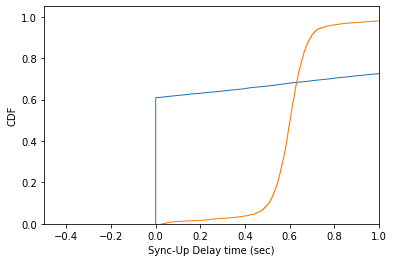

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
parse_dir = "./dsanalyzer_parsed"
typ = "DDP4GPU"
suffix_dir = ""
filename = "fsNprepNloadNtrain_openimage_randaugment_resnet50_epoch5_b512_worker16_thread0_stalldifftime"
file_path = f"{parse_dir}/{typ}/{suffix_dir}/{filename}.csv"
df=pd.read_csv(file_path)

suffix_dir = ""
filename = "fsNprepNloadNtrainAdaptiveBackIntraIterGM_openimage_randaugment_resnet50_epoch1_b512_worker16_thread8_stalldifftime"
file_path = f"{parse_dir}/{typ}/{suffix_dir}/{filename}.csv"
df2=pd.read_csv(file_path)
# filename = "fsNprepNloadNtrainBackFIFOPolicy_openimage_randaugment_resnet50_epoch1_b256_worker10_thread4_stalldifftime"
# file_path = f"{parse_dir}/{typ}/{suffix_dir}/{filename}.csv"
# df2=pd.read_csv(file_path)

# filename = "fsNprepNloadNtrainBackIntraIterGM_openimage_randaugment_resnet50_epoch1_b512_worker16_thread8_stalldifftime"
# file_path = f"{parse_dir}/{typ}/{suffix_dir}/{filename}.csv"
# df3=pd.read_csv(file_path)

# df["timestamp"] = pd.to_datetime(df["timestamp"], format='%Y/%m/%d %H:%M:%S.%f', errors='ignore')

# df.plot(x="timestamp", y=yaxis, linewidth=0, marker='x',markersize=5, figsize=(60,5))
yaxis = ["Delay time diff (sec)"]

ax = df[yaxis[0]].plot.hist(cumulative=True, density=1, bins=10000, histtype='step')
ax = df2[yaxis[0]].plot.hist(cumulative=True, density=1, bins=10000, histtype='step')
# ax = df3[yaxis[0]].plot.hist(cumulative=True, density=1, bins=10000, histtype='step')
# ax.legend(loc="upper left")
# ax.set_xlim(xmin=-0.5,xmax=9.0)
ax.set_xlim(xmin=-0.5,xmax=1.0)
ax.set_ylabel('CDF')
ax.set_xlabel('Sync-Up Delay time (sec)')
# ax.legend(loc="upper left")
plt.savefig(f'./test1.svg', bbox_inches='tight')

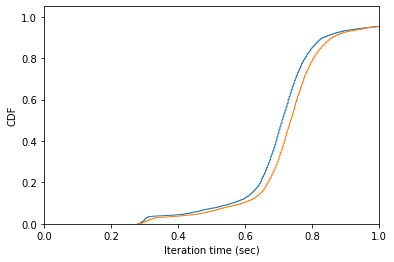

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
parse_dir = "./dsanalyzer_parsed"
typ = "DDP2GPU"
suffix_dir = ""
filename = "fsNprepNloadNtrainBackFIFOPolicy_openimage_randaugment_resnet50_epoch1_b256_worker10_thread8back"
file_path = f"{parse_dir}/{typ}/{suffix_dir}/{filename}.csv"
df=pd.read_csv(file_path)

suffix_dir = ""
filename = "fsNprepNloadNtrainBackFIFOPolicy_openimage_randaugment_resnet50_epoch1_b256_worker10_thread8"
file_path = f"{parse_dir}/{typ}/{suffix_dir}/{filename}.csv"
df2=pd.read_csv(file_path)
# filename = "fsNprepNloadNtrainBackFIFOPolicy_openimage_randaugment_resnet50_epoch1_b256_worker10_thread4_stalldifftime"
# file_path = f"{parse_dir}/{typ}/{suffix_dir}/{filename}.csv"
# df2=pd.read_csv(file_path)

# filename = "fsNprepNloadNtrain075thresBackFIFOPolicy_openimage_randaugment_resnet50_epoch1_b256_worker10_thread4_stalldifftime"
# file_path = f"{parse_dir}/{typ}/{suffix_dir}/{filename}.csv"
# df3=pd.read_csv(file_path)

# df["timestamp"] = pd.to_datetime(df["timestamp"], format='%Y/%m/%d %H:%M:%S.%f', errors='ignore')

# df.plot(x="timestamp", y=yaxis, linewidth=0, marker='x',markersize=5, figsize=(60,5))
yaxis = ["Iteration time (sec)"]

ax = df[yaxis[0]].plot.hist(cumulative=True, density=1, bins=10000, histtype='step')
ax = df2[yaxis[0]].plot.hist(cumulative=True, density=1, bins=10000, histtype='step')
# ax = df3[yaxis[0]].plot.hist(cumulative=True, density=1, bins=10000, histtype='step')
# ax.legend(loc="upper left")
ax.set_xlim(xmin=0,xmax=1.0)
ax.set_ylabel('CDF')
ax.set_xlabel('Iteration time (sec)')
# ax.legend(loc="upper left")
plt.savefig(f'./test1.svg', bbox_inches='tight')

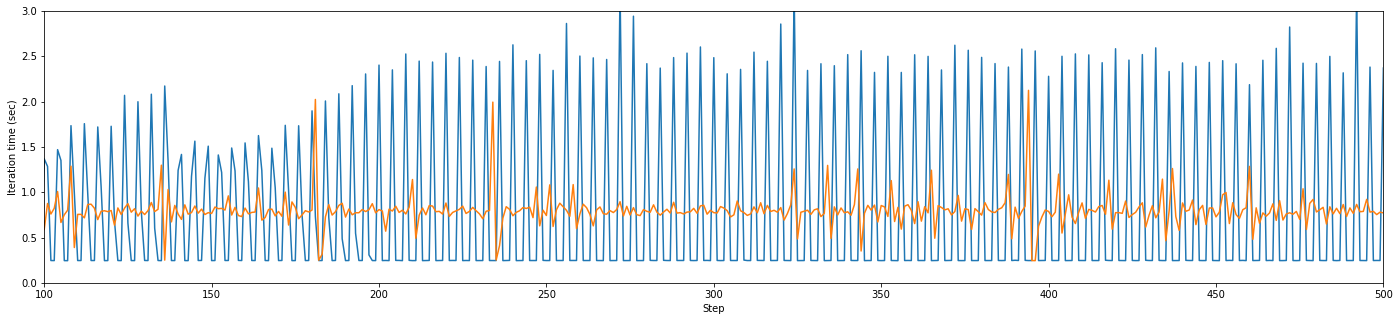

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
parse_dir = "./dsanalyzer_parsed"
typ = "DDP4GPUInter"
suffix_dir = ""
filename = "fsNprepNloadNtrain_openimage_randaugment_resnet50_epoch1_b512_worker16_thread8"
file_path = f"{parse_dir}/{typ}/{suffix_dir}/{filename}.csv"
df=pd.read_csv(file_path)

suffix_dir = ""
filename = "fsNprepNloadNtrainAdaptiveBackIntraIterGM_openimage_randaugment_resnet50_epoch1_b512_worker16_thread8"
file_path = f"{parse_dir}/{typ}/{suffix_dir}/{filename}.csv"
df2=pd.read_csv(file_path)
# filename = "fsNprepNloadNtrainBackFIFOPolicy_openimage_randaugment_resnet50_epoch1_b256_worker10_thread4_stalldifftime"
# file_path = f"{parse_dir}/{typ}/{suffix_dir}/{filename}.csv"
# df2=pd.read_csv(file_path)

# filename = "fsNprepNloadNtrain075thresBackFIFOPolicy_openimage_randaugment_resnet50_epoch1_b256_worker10_thread4_stalldifftime"
# file_path = f"{parse_dir}/{typ}/{suffix_dir}/{filename}.csv"
# df3=pd.read_csv(file_path)

# df["timestamp"] = pd.to_datetime(df["timestamp"], format='%Y/%m/%d %H:%M:%S.%f', errors='ignore')

# df.plot(x="timestamp", y=yaxis, linewidth=0, marker='x',markersize=5, figsize=(60,5))
yaxis = ["Iteration time (sec)"]
df = df[df["Step"] > 10]
df = df[df["GPU"] == 0]
df2 = df2[df2["Step"] > 10]
df2 = df2[df2["GPU"] == 0]
ax = df.plot(x="Step",y=yaxis[0],figsize=(24,5))
df2.plot(ax=ax,x="Step",y=yaxis[0],figsize=(24,5))
# ax = df3[yaxis[0]].plot.hist(cumulative=True, density=1, bins=10000, histtype='step')
# ax.legend(loc="upper left")
ax.set_xlim(xmin=100,xmax=500)
ax.set_ylim(ymax=3.0, ymin=0)
ax.set_ylabel('Iteration time (sec)')
ax.get_legend().remove()

ax.set_xlabel('Step')
# ax.legend(loc="upper left")
plt.savefig(f'./test1.svg', bbox_inches='tight')

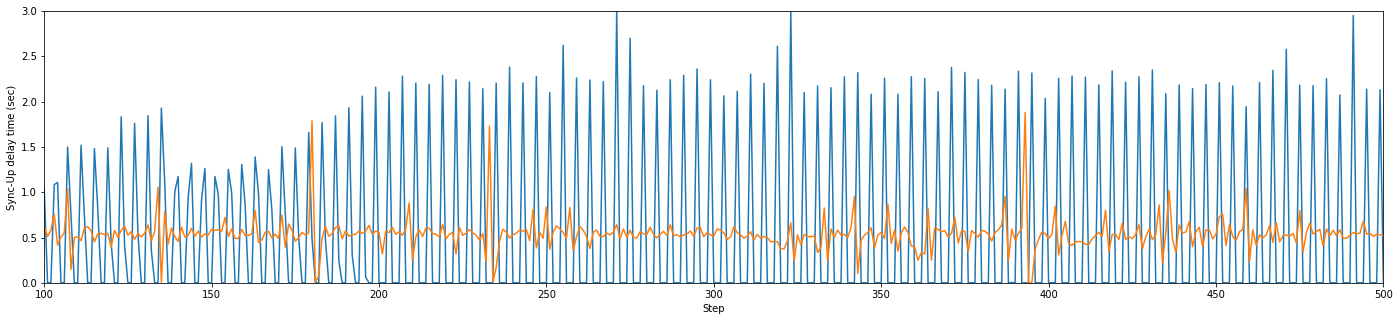

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
parse_dir = "./dsanalyzer_parsed"
typ = "DDP4GPUInter"
suffix_dir = ""
filename = "fsNprepNloadNtrain_openimage_randaugment_resnet50_epoch1_b512_worker16_thread8_stalldifftime"
file_path = f"{parse_dir}/{typ}/{suffix_dir}/{filename}.csv"
df=pd.read_csv(file_path)

suffix_dir = ""
filename = "fsNprepNloadNtrainAdaptiveBackIntraIterGM_openimage_randaugment_resnet50_epoch1_b512_worker16_thread8_stalldifftime"
file_path = f"{parse_dir}/{typ}/{suffix_dir}/{filename}.csv"
df2=pd.read_csv(file_path)
# filename = "fsNprepNloadNtrainBackFIFOPolicy_openimage_randaugment_resnet50_epoch1_b256_worker10_thread4_stalldifftime"
# file_path = f"{parse_dir}/{typ}/{suffix_dir}/{filename}.csv"
# df2=pd.read_csv(file_path)

# filename = "fsNprepNloadNtrain075thresBackFIFOPolicy_openimage_randaugment_resnet50_epoch1_b256_worker10_thread4_stalldifftime"
# file_path = f"{parse_dir}/{typ}/{suffix_dir}/{filename}.csv"
# df3=pd.read_csv(file_path)

# df["timestamp"] = pd.to_datetime(df["timestamp"], format='%Y/%m/%d %H:%M:%S.%f', errors='ignore')

# df.plot(x="timestamp", y=yaxis, linewidth=0, marker='x',markersize=5, figsize=(60,5))
yaxis = ["Delay time diff (sec)"]
# df = df[df["Step"] > 10]
# df2 = df2[df2["Step"] > 10]
ax = df[yaxis[0]].plot(figsize=(24,5))
ax = df2[yaxis[0]].plot(figsize=(24,5))
# ax = df3[yaxis[0]].plot.hist(cumulative=True, density=1, bins=10000, histtype='step')
# ax.legend(loc="upper left")
ax.set_xlim(xmin=100,xmax=500)
ax.set_ylim(ymax=3.0, ymin=0)
ax.set_ylabel('Sync-Up delay time (sec)')
ax.set_xlabel('Step')
# ax.legend(loc="upper left")
plt.savefig(f'./test1.svg', bbox_inches='tight')

In [ ]:
df[df["Step"] > 10]["Iteration time (sec)"].describe()

count    13594.000000
mean         0.726040
std          0.224789
min          0.278511
25%          0.662522
50%          0.713305
75%          0.765583
max          4.349975
Name: Iteration time (sec), dtype: float64

In [ ]:
df2[df2["Step"] > 10]["Iteration time (sec)"].describe()

count    13594.000000
mean         0.750012
std          0.230435
min          0.279316
25%          0.686539
50%          0.738317
75%          0.791021
max          5.450705
Name: Iteration time (sec), dtype: float64

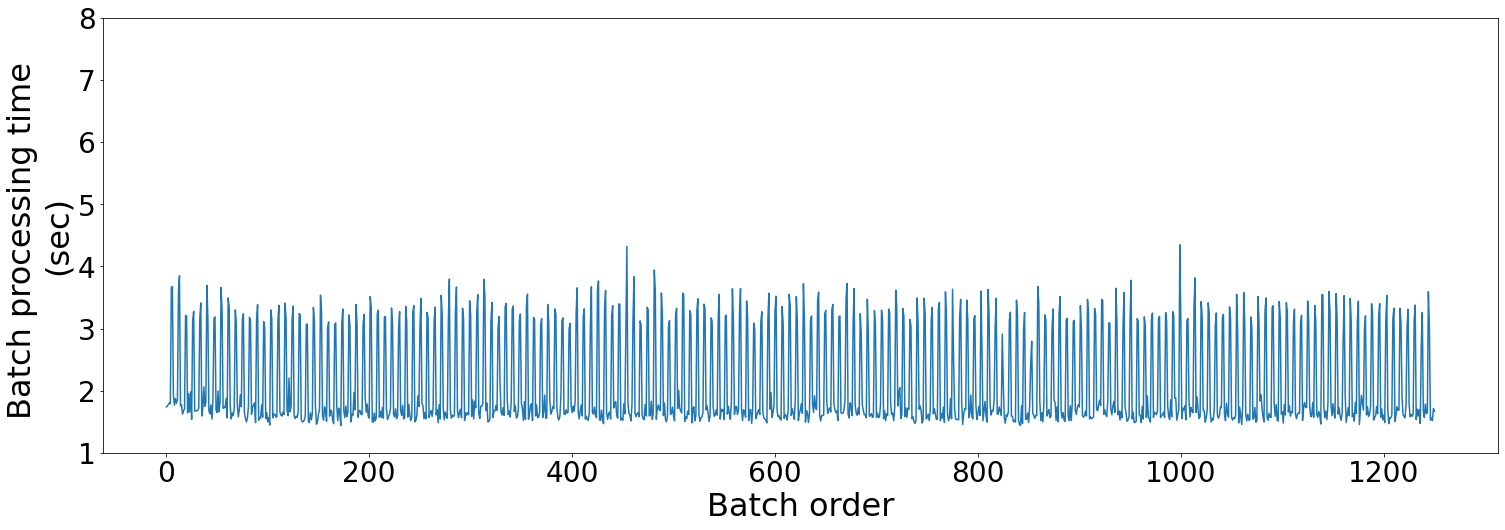

In [2]:

import matplotlib.pyplot as plt
import pandas as pd
# linewidth = 1.5
# label_fontsize = 20
# xlabel_fontsize = 20
# inside_fontsize=18
# legend_fontsize = 19
# tick_fontsize = 24
# title_fontsize = 32
# bar_width = 0.7
plt.rc('font', family="sans-serif", serif='Arial')
plt.rc('text', usetex=False)
plt.rc('xtick', labelsize=28)
plt.rc('ytick', labelsize=28)
plt.rc('axes', labelsize=32)
plt.rc('legend', fontsize=24)

parse_dir = "./dsanalyzer_parsed"
typ = "DDP4GPUInterFULLTRACE"
suffix_dir = "simp"
filename = "origin_main_pin_Imagenet_default_resnet50_epoch1_b1024_worker28_thread4_simp"
file_path = f"{parse_dir}/{typ}/{suffix_dir}/{filename}.csv"
df=pd.read_csv(file_path)

# suffix_dir = ""
# filename = "fsNprepNloadNtrainAdaptiveBackIntraIterGM_openimage_randaugment_resnet50_epoch1_b512_worker16_thread8_stalldifftime"
# file_path = f"{parse_dir}/{typ}/{suffix_dir}/{filename}.csv"
# df2=pd.read_csv(file_path)
# filename = "fsNprepNloadNtrainBackFIFOPolicy_openimage_randaugment_resnet50_epoch1_b256_worker10_thread4_stalldifftime"
# file_path = f"{parse_dir}/{typ}/{suffix_dir}/{filename}.csv"
# df2=pd.read_csv(file_path)

# filename = "fsNprepNloadNtrain075thresBackFIFOPolicy_openimage_randaugment_resnet50_epoch1_b256_worker10_thread4_stalldifftime"
# file_path = f"{parse_dir}/{typ}/{suffix_dir}/{filename}.csv"
# df3=pd.read_csv(file_path)

# df["timestamp"] = pd.to_datetime(df["timestamp"], format='%Y/%m/%d %H:%M:%S.%f', errors='ignore')

# df.plot(x="timestamp", y=yaxis, linewidth=0, marker='x',markersize=5, figsize=(60,5))
figsize=(25,8)
yaxis = ["Fetch time (sec)"]
gpu_df = []
df = df.sort_values("Index number")
for i in range(4):
    gpu_single_df = df[df["GPU"] == i]
    gpu_df.append(gpu_single_df)

# df2 = df2[df2["Step"] > 10]
ax = gpu_df[0].plot(x="Index number",y=yaxis[0], figsize=figsize)
# gpu_df[1].plot(ax =ax,x="Index number",y=yaxis[0], figsize=figsize)
ax.get_legend().remove()
# for i in range(1, 4):
#     gpu_df[i].plot(ax =ax,x="Index number",y=yaxis[0], figsize=figsize)
# ax = df3[yaxis[0]].plot.hist(cumulative=True, density=1, bins=10000, histtype='step')
# ax.legend(loc="upper left")
# L = ax.legend()
# for i in range(2):
#     L.get_texts()[i].set_text(f'GPU{i}')

# ax.set_xlim(xmin=0,xmax=2000)
ax.set_ylim(ymax=8, ymin=1)
ax.set_ylabel('Batch processing time \n(sec)')
ax.set_xlabel('Batch order')
# ax.legend(loc="upper left")
plt.savefig(f'./batch_level_original.svg', bbox_inches='tight')

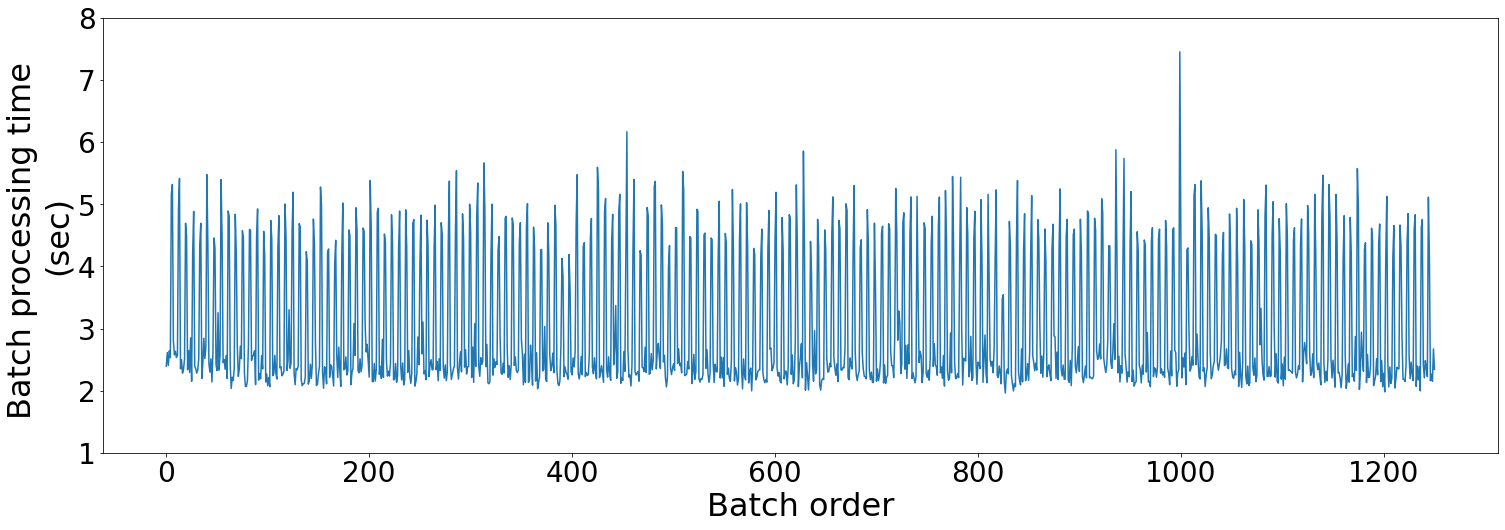

In [3]:

import matplotlib.pyplot as plt
import pandas as pd
# linewidth = 1.5
# label_fontsize = 20
# xlabel_fontsize = 20
# inside_fontsize=18
# legend_fontsize = 19
# tick_fontsize = 24
# title_fontsize = 32
# bar_width = 0.7
plt.rc('font', family="sans-serif", serif='Arial')
plt.rc('text', usetex=False)
plt.rc('xtick', labelsize=28)
plt.rc('ytick', labelsize=28)
plt.rc('axes', labelsize=32)
plt.rc('legend', fontsize=24)

parse_dir = "./dsanalyzer_parsed"
typ = "DDP4GPUInterFULLTRACE"
suffix_dir = "simp"
filename = "origin_main_pin_Imagenet_randaugment_resnet50_epoch1_b1024_worker28_thread4_simp"
file_path = f"{parse_dir}/{typ}/{suffix_dir}/{filename}.csv"
df=pd.read_csv(file_path)

# suffix_dir = ""
# filename = "fsNprepNloadNtrainAdaptiveBackIntraIterGM_openimage_randaugment_resnet50_epoch1_b512_worker16_thread8_stalldifftime"
# file_path = f"{parse_dir}/{typ}/{suffix_dir}/{filename}.csv"
# df2=pd.read_csv(file_path)
# filename = "fsNprepNloadNtrainBackFIFOPolicy_openimage_randaugment_resnet50_epoch1_b256_worker10_thread4_stalldifftime"
# file_path = f"{parse_dir}/{typ}/{suffix_dir}/{filename}.csv"
# df2=pd.read_csv(file_path)

# filename = "fsNprepNloadNtrain075thresBackFIFOPolicy_openimage_randaugment_resnet50_epoch1_b256_worker10_thread4_stalldifftime"
# file_path = f"{parse_dir}/{typ}/{suffix_dir}/{filename}.csv"
# df3=pd.read_csv(file_path)

# df["timestamp"] = pd.to_datetime(df["timestamp"], format='%Y/%m/%d %H:%M:%S.%f', errors='ignore')

# df.plot(x="timestamp", y=yaxis, linewidth=0, marker='x',markersize=5, figsize=(60,5))
figsize=(25,8)
yaxis = ["Fetch time (sec)"]
gpu_df = []
df = df.sort_values("Index number")
for i in range(4):
    gpu_single_df = df[df["GPU"] == i]
    gpu_df.append(gpu_single_df)

# df2 = df2[df2["Step"] > 10]
ax = gpu_df[0].plot(x="Index number",y=yaxis[0], figsize=figsize)
# gpu_df[1].plot(ax =ax,x="Index number",y=yaxis[0], figsize=figsize)
ax.get_legend().remove()
# for i in range(1, 4):
#     gpu_df[i].plot(ax =ax,x="Index number",y=yaxis[0], figsize=figsize)
# ax = df3[yaxis[0]].plot.hist(cumulative=True, density=1, bins=10000, histtype='step')
# ax.legend(loc="upper left")
# L = ax.legend()
# for i in range(2):
#     L.get_texts()[i].set_text(f'GPU{i}')

# ax.set_xlim(xmin=0,xmax=2000)
ax.set_ylim(ymax=8, ymin=1)
ax.set_ylabel('Batch processing time \n(sec)')
ax.set_xlabel('Batch order')
# ax.legend(loc="upper left")
plt.savefig(f'./batch_level_randaug.svg', bbox_inches='tight')

In [1]:

import matplotlib.pyplot as plt
import pandas as pd
# linewidth = 1.5
# label_fontsize = 20
# xlabel_fontsize = 20
# inside_fontsize=18
# legend_fontsize = 19
# tick_fontsize = 24
# title_fontsize = 32
# bar_width = 0.7
plt.rc('font', family="sans-serif", serif='Arial')
plt.rc('text', usetex=False)
plt.rc('xtick', labelsize=28)
plt.rc('ytick', labelsize=28)
plt.rc('axes', labelsize=32)
plt.rc('legend', fontsize=24)

parse_dir = "./dsanalyzer_parsed"
typ = "DDP4GPUInterFULLTRACE"
suffix_dir = "simp"
filename = "fsNprepNloadNtrain_openimage_randaugment_resnet50_epoch1_b512_worker16_thread0_simp"
file_path = f"{parse_dir}/{typ}/{suffix_dir}/{filename}.csv"
df=pd.read_csv(file_path)

# suffix_dir = ""
# filename = "fsNprepNloadNtrainAdaptiveBackIntraIterGM_openimage_randaugment_resnet50_epoch1_b512_worker16_thread8_stalldifftime"
# file_path = f"{parse_dir}/{typ}/{suffix_dir}/{filename}.csv"
# df2=pd.read_csv(file_path)
# filename = "fsNprepNloadNtrainBackFIFOPolicy_openimage_randaugment_resnet50_epoch1_b256_worker10_thread4_stalldifftime"
# file_path = f"{parse_dir}/{typ}/{suffix_dir}/{filename}.csv"
# df2=pd.read_csv(file_path)

# filename = "fsNprepNloadNtrain075thresBackFIFOPolicy_openimage_randaugment_resnet50_epoch1_b256_worker10_thread4_stalldifftime"
# file_path = f"{parse_dir}/{typ}/{suffix_dir}/{filename}.csv"
# df3=pd.read_csv(file_path)

# df["timestamp"] = pd.to_datetime(df["timestamp"], format='%Y/%m/%d %H:%M:%S.%f', errors='ignore')

# df.plot(x="timestamp", y=yaxis, linewidth=0, marker='x',markersize=5, figsize=(60,5))
figsize=(25,8)
yaxis = ["Fetch time (sec)"]
gpu_df = []
df = df.sort_values("Index number")
for i in range(4):
    gpu_single_df = df[df["GPU"] == i]
    gpu_df.append(gpu_single_df)

# df2 = df2[df2["Step"] > 10]
ax = gpu_df[0].plot(x="Index number",y=yaxis[0], figsize=figsize)
gpu_df[1].plot(ax =ax,x="Index number",y=yaxis[0], figsize=figsize)
# ax.get_legend().remove()
# for i in range(1, 4):
#     gpu_df[i].plot(ax =ax,x="Index number",y=yaxis[0], figsize=figsize)
# ax = df3[yaxis[0]].plot.hist(cumulative=True, density=1, bins=10000, histtype='step')
# ax.legend(loc="upper left")
L = ax.legend()
for i in range(2):
    L.get_texts()[i].set_text(f'GPU{i}')

ax.set_xlim(xmin=100,xmax=2000)
ax.set_ylim(ymax=8)#, ymin=2)
ax.set_ylabel('Batch processing time \n(sec)')
ax.set_xlabel('Batch order')
# ax.legend(loc="upper left")
plt.savefig(f'./batch_level_multi_randaugment.svg', bbox_inches='tight')

FileNotFoundError: [Errno 2] No such file or directory: './dsanalyzer_parsed/DDP4GPUInterFULLTRACE/simp/fsNprepNloadNtrain_openimage_randaugment_resnet50_epoch1_b512_worker16_thread0_simp.csv'

In [24]:

import matplotlib.pyplot as plt
import pandas as pd
# linewidth = 1.5
# label_fontsize = 20
# xlabel_fontsize = 20
# inside_fontsize=18
# legend_fontsize = 19
# tick_fontsize = 24
# title_fontsize = 32
# bar_width = 0.7
plt.rc('font', family="sans-serif", serif='Arial')
plt.rc('text', usetex=False)
plt.rc('xtick', labelsize=28)
plt.rc('ytick', labelsize=28)
plt.rc('axes', labelsize=32)
plt.rc('legend', fontsize=24)

parse_dir = "./dsanalyzer_parsed"
typ = "DDP4GPUInterFULLTRACE"
suffix_dir = "simp"
filename = "gpu_util"
file_path = f"./{filename}.csv"
df=pd.read_csv(file_path)

gpu_df = []
gpu_list = ["GPU0","GPU1","GPU4","GPU5"]
df = df[["timestamp"]+gpu_list]

for gpu in gpu_list:
    # gpu_df.append(df[df[gpu] < 5])
    gpu_df.append(df[df[gpu] < 5][gpu])


# ax = gpu_df[0].plot(x="timestamp", y=gpu_list[0])#, figsize=figsize)

# L = ax.legend()
# for i in range(2):
#     L.get_texts()[i].set_text(f'GPU{i}')

# ax.set_xlim(xmin=100,xmax=2000)
# ax.set_ylim(ymax=8)#, ymin=2)
# ax.set_ylabel('Batch processing time \n(sec)')
# ax.set_xlabel('Batch order')
# # ax.legend(loc="upper left")
# plt.savefig(f'./gpu_util.svg', bbox_inches='tight')

In [25]:
df.describe()


,GPU0,GPU1,GPU4,GPU5
count,161299.000000,161299.000000,161299.000000,161299.000000
mean,57.974061,69.476568,36.361038,38.043224
std,41.108084,37.351849,38.919450,39.417267
min,0.000000,0.000000,0.000000,0.000000
25%,11.000000,39.000000,0.000000,0.000000
50%,69.000000,93.000000,21.000000,25.000000
75%,100.000000,100.000000,75.000000,78.000000
max,100.000000,100.000000,100.000000,100.000000


In [26]:
time_str = "timestamp"
df[time_str] = pd.to_datetime(df[time_str], format='%Y-%m-%d %H:%M:%S.%f', errors='ignore')
gpu_arr = []
# for gpu in gpu_list:
gpu = 'GPU0'
for gpu in gpu_list:
    arr = []
    start_timestamp = None
    for index, row in df.iterrows():
        
        if start_timestamp == None:
            if row[gpu] == 0:
                start_timestamp = row[time_str]
                # print(row)
        else:
            if row[gpu] > 0:
                arr.append((row[time_str] - start_timestamp).total_seconds())
                # print(row)
                start_timestamp = None
                # break
    print(gpu, " avg: ", sum(arr)/len(arr))
    gpu_arr.append(arr)

GPU0  avg:  0.26986094595910376
GPU1  avg:  0.29040560881801114
GPU4  avg:  0.3961472303523031
GPU5  avg:  0.38804736865569267


In [28]:
gpu_time_df=pd.DataFrame(gpu_arr).transpose()
gpu_time_df.describe()

,0,1,2,3
count,2054.000000,1066.000000,2952.000000,2916.000000
mean,0.269861,0.290406,0.396147,0.388047
std,0.228910,0.290105,0.275466,0.433933
min,0.194777,0.198009,0.194537,0.198499
25%,0.215044,0.213615,0.221299,0.219198
50%,0.218158,0.217221,0.430705,0.425779
75%,0.227901,0.228580,0.440036,0.437443
max,6.085328,4.564491,6.296191,10.639450


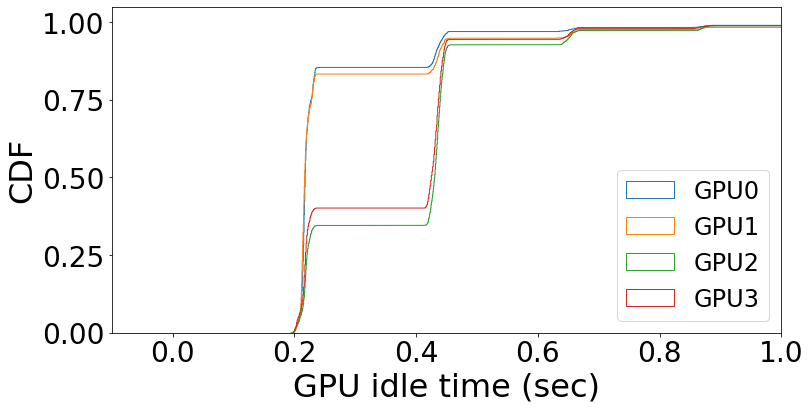

In [31]:
gpu_list = [0,1,2,3]
ax = gpu_time_df[gpu_list[0]].plot.hist(cumulative=True, density=1, bins=10000, histtype='step', figsize=figsize)
for i in range(1,4):
    gpu_time_df[gpu_list[i]].plot.hist(ax = ax, cumulative=True, density=1, bins=10000, histtype='step', figsize=figsize)

ax.set_ylabel('CDF')
ax.set_xlabel('GPU idle time (sec)')

ax.set_xlim(xmin=-0.1,xmax=1)
L = ax.legend(loc="lower right")
for i in range(len(gpu_list)):
    L.get_texts()[i].set_text(f'GPU{i}')

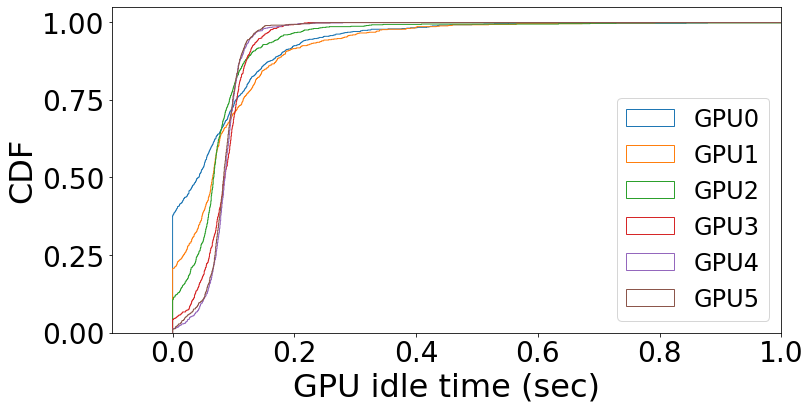

In [4]:

import matplotlib.pyplot as plt
import pandas as pd
# linewidth = 1.5
# label_fontsize = 20
# xlabel_fontsize = 20
# inside_fontsize=18
# legend_fontsize = 19
# tick_fontsize = 24
# title_fontsize = 32
# bar_width = 0.7
plt.rc('font', family="sans-serif", serif='Arial')
plt.rc('text', usetex=False)
plt.rc('xtick', labelsize=28)
plt.rc('ytick', labelsize=28)
plt.rc('axes', labelsize=32)
plt.rc('legend', fontsize=24)



parse_dir = "./dsanalyzer_parsed"
typ = "DDP6GPUInter"
# suffix_dir = "GPU_Util"
suffix_dir = ""
filename = "CPUPolicy_Imagenet_randaugment_resnet50_epoch1_b1536_worker24_thread4_stalldifftime"
file_path = f"{parse_dir}/{suffix_dir}/{typ}/{filename}.csv"
df=pd.read_csv(file_path)

gpu_df = []
gpu_list = ["Training stall time (sec)_gpu0","Training stall time (sec)_gpu1","Training stall time (sec)_gpu2","Training stall time (sec)_gpu3","Training stall time (sec)_gpu4","Training stall time (sec)_gpu5"]

figsize=(12,6)
# ax = df.plot(x = "Step", y = gpu_list, figsize=figsize)
ax = df[gpu_list[0]].plot.hist(cumulative=True, density=1, bins=100000, histtype='step', figsize=figsize)
for i in range(1, len(gpu_list)):
    df[gpu_list[i]].plot.hist(ax = ax, cumulative=True, density=1, bins=100000, histtype='step', figsize=figsize)

ax.set_ylabel('CDF')
ax.set_xlabel('GPU idle time (sec)')

ax.set_xlim(xmin=-0.1,xmax=1)
L = ax.legend(loc="lower right")
for i in range(len(gpu_list)):
    L.get_texts()[i].set_text(f'GPU{i}')
    
plt.savefig(f'./GPU_idleness_Imagenet.svg', bbox_inches='tight')

In [22]:
df.describe()

,Unnamed: 0,Epoch,Step,Training stall time (sec)_gpu0,Training stall time (sec)_gpu1,Training stall time (sec)_gpu2,Training stall time (sec)_gpu3,Delay time diff (sec)
count,3403.00000,3403.0,3403.00000,3403.000000,3403.000000,3403.000000,3403.000000,3403.000000
mean,1701.00000,0.0,1702.00000,0.286475,0.180320,0.467575,0.400351,0.498159
std,982.50581,0.0,982.50581,0.227466,0.234423,0.249749,0.312526,0.330885
min,0.00000,0.0,1.00000,0.000001,0.000001,0.000001,0.000001,0.000003
25%,850.50000,0.0,851.50000,0.132643,0.000002,0.361204,0.195217,0.364892
50%,1701.00000,0.0,1702.00000,0.254624,0.098902,0.511382,0.442880,0.488847
75%,2551.50000,0.0,2552.50000,0.412651,0.312773,0.584103,0.564667,0.578011
max,3402.00000,0.0,3403.00000,2.461844,3.884526,4.075958,5.535543,5.535541
